In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [37]:
# load package for loading data
import pandas as pd

In [38]:
housing_dataset = pd.read_csv('/content/housing.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [39]:
X = housing_dataset.drop(columns=['ZN','CHAS','RAD','MEDV'])
y = housing_dataset.drop(columns=['MEDV'])

In [40]:
# load package for spliting data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [41]:
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

array([[-0.49300093],
       [-0.56629773],
       [ 2.14394409],
       [-0.60170661],
       [ 0.49191917],
       [-1.98756891],
       [-1.47852199],
       [-0.46947439],
       [-0.33450124],
       [ 0.12029563],
       [-0.56372455],
       [-0.26465683],
       [ 0.04698059],
       [-0.80227727],
       [ 0.51503527],
       [-0.54438272],
       [-0.01224677],
       [ 2.1221562 ],
       [ 0.50404652],
       [ 0.30154734],
       [-0.66178646],
       [ 0.62284993],
       [ 1.87617084],
       [ 1.30547881],
       [ 1.83145877],
       [-0.29900735],
       [-1.21418861],
       [-2.0674421 ],
       [-0.82723094],
       [-1.53411417],
       [ 0.30729952],
       [ 0.07580456],
       [ 0.58685709],
       [ 0.36163603],
       [ 0.35711257],
       [ 1.55115198],
       [-0.82068232],
       [-1.081548  ],
       [-0.08912004],
       [ 0.34175598],
       [ 1.57921282],
       [-0.50347565],
       [ 0.31424733],
       [ 0.85639879],
       [-1.59442766],
       [ 0

### Data Visualization

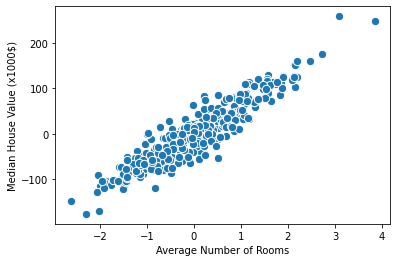

In [42]:
# visualize data 
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Gradient Descent

In [43]:
class LinearRegression_GD:
    def __init__(self, eta=0.001, max_iter=20, random_state=None):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []

    def predict(self, X): 
        return np.dot(X, self.w[1:]) + self.w[0]

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.costs = []
        for n_iters in range(self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.sum(diff)
            for j in range(X.shape[1]): 
                delta = 0.0
                for i in range(X.shape[0]): 
                    delta += self.eta * diff[i] * X[i][j]
                self.w[j + 1] += delta
            cost = np.sum(diff ** 2) / 2
            self.costs.append(cost)


- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

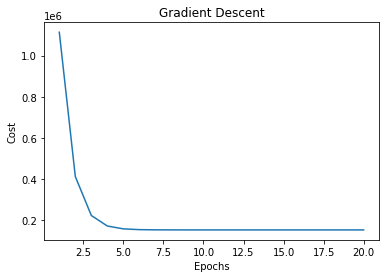

In [44]:
# Initialize the model
reg_GD = LinearRegression_GD(eta=0.001, max_iter=20, random_state=42)
# Train model
reg_GD.fit(X,y)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

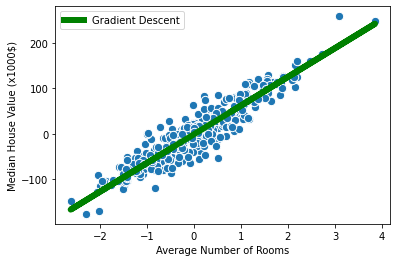

In [45]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

In [46]:
w_GD = reg_GD.w
w_GD
[-0.9794002, 63.18592509]

[-0.9794002, 63.18592509]

### Linear Regression (Stochastic Gradient Descent)

In [47]:
# load package for initalizing 'Stochastic Gradient Descent' model
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [48]:
# Initialize the model
reg_SGD = SGDRegressor(eta0=0.001, max_iter=20,
random_state=42, learning_rate='constant')


# Train model
reg_SGD.fit(X, y)


SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=20, random_state=42)

In [49]:
reg_NE = LinearRegression()
reg_NE.fit(X, y)

LinearRegression()

In [50]:
w_GD = reg_GD.w
w_GD
[-0.9794002, 63.18592509]

[-0.9794002, 63.18592509]

In [51]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD
[-1.02681553, 63.08630288]

[-1.02681553, 63.08630288]

In [52]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE
[-0.97941333, 63.18605572]

[-0.97941333, 63.18605572]

Visualize the prediction of Stochastic Gradient Descent model on Training Data

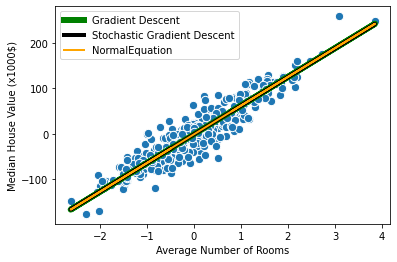

In [53]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='NormalEquation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation

In [54]:
# load package for initalizing 'Normal Equation' model
from sklearn.linear_model import LinearRegression

In [55]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X, y)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

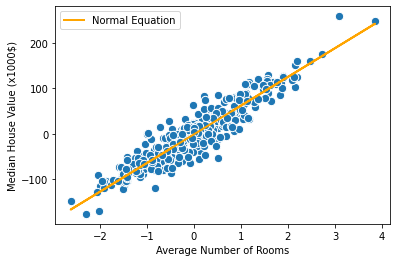

In [56]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

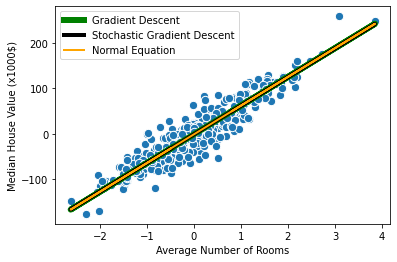

In [57]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_GD.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [58]:
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[-0.9794002  63.18592509]
[-1.02681553 63.08630288]
[-0.97941333 63.18605572]


Performance Comparisons (on Testing Set)

In [59]:
y_pred_GD = reg_GD.predict(X)

In [60]:
y_pred_SGD = reg_SGD.predict(X)

In [61]:
y_pred_NE = reg_NE.predict(X)

In [62]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [63]:
print('MAE of GD:', round(MAE(y, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y, y_pred_NE), 6))

MAE of GD: 19.705208
MAE of SGD: 19.705117
MAE of NE: 19.70521


In [64]:
print('MSE of GD:', round(MSE(y, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y, y_pred_NE), 6))

MSE of GD: 616.709869
MSE of SGD: 616.721743
MSE of NE: 616.709869


In [65]:
print('R2 of GD:', round(R2(y, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y, y_pred_NE), 6))

R2 of GD: 0.861513
R2 of SGD: 0.861511
R2 of NE: 0.861513


## Experiment with Standardized Data

In [66]:
# Re-load the dataset
housing_dataset = pd.read_csv('/content/housing.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [67]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [68]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [69]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset[['RM']]
y = housing_dataset['MEDV']

In [70]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

In [72]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42)


# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

ValueError: ignored

Visualize the prediction of Gradient Descent model on Training Data



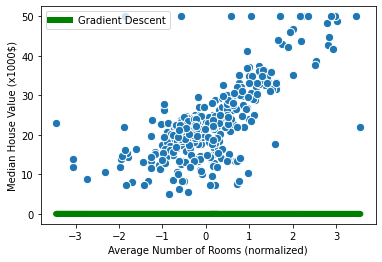

In [73]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Linear Regression (Stochastic Gradient Descent)

In [75]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(learning_rate='constant', eta0=1e-3, max_iter=200, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)


SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=200,
             random_state=42)

Visualize the prediction of Stochastic Gradient Descent model on Training Data


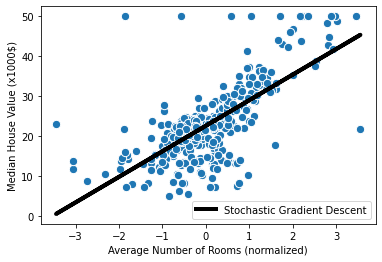

In [76]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation

In [77]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

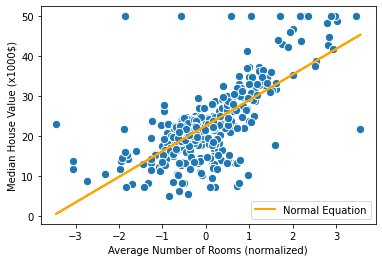

In [78]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

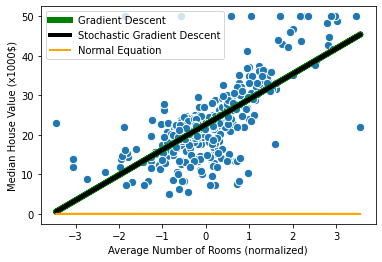

In [79]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [80]:
w_GD = reg_GD.w
w_GD

array([ 0.00496714, -0.00138264])

In [81]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.62083926,  6.39567675])

In [82]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.64163118,  6.40020122])

In [83]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [84]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [85]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [86]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 21.402739
MAE of SGD: 4.312817
MAE of NE: 4.314224


In [87]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 532.605405
MSE of SGD: 40.336472
MSE of NE: 40.35145


In [88]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: -6.147809
R2 of SGD: 0.458666
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [89]:
# Re-load dataset
housing_dataset = pd.read_csv('/content/housing.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [90]:
X = housing_dataset.drop('MEDV', axis=1)
y = housing_dataset['MEDV']

In [100]:
# Train-test set spliting with ratio 7:3, random_state = 42
X, y = make_regression(n_samples=500, n_features=1, n_informative=1, noise=25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

array([[-0.49300093],
       [-0.56629773],
       [ 2.14394409],
       [-0.60170661],
       [ 0.49191917],
       [-1.98756891],
       [-1.47852199],
       [-0.46947439],
       [-0.33450124],
       [ 0.12029563],
       [-0.56372455],
       [-0.26465683],
       [ 0.04698059],
       [-0.80227727],
       [ 0.51503527],
       [-0.54438272],
       [-0.01224677],
       [ 2.1221562 ],
       [ 0.50404652],
       [ 0.30154734],
       [-0.66178646],
       [ 0.62284993],
       [ 1.87617084],
       [ 1.30547881],
       [ 1.83145877],
       [-0.29900735],
       [-1.21418861],
       [-2.0674421 ],
       [-0.82723094],
       [-1.53411417],
       [ 0.30729952],
       [ 0.07580456],
       [ 0.58685709],
       [ 0.36163603],
       [ 0.35711257],
       [ 1.55115198],
       [-0.82068232],
       [-1.081548  ],
       [-0.08912004],
       [ 0.34175598],
       [ 1.57921282],
       [-0.50347565],
       [ 0.31424733],
       [ 0.85639879],
       [-1.59442766],
       [ 0

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

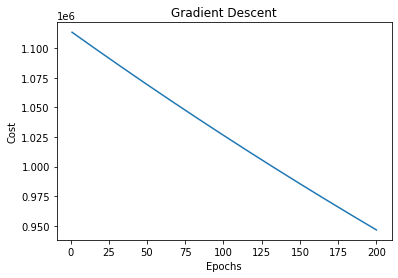

In [101]:
# Initalize the GD model
reg_GD = LinearRegression_GD(max_iter=200, random_state=42, eta=1e-6)


# Train model
reg_GD.fit(X,y)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Linear Regression (Stochastic Gradient Descent)

In [103]:
# Initialize the SGD model 
reg_SGD = SGDRegressor(eta0=0.001, max_iter=20,
random_state=42, learning_rate='constant')
# Train model
reg_SGD.fit(X, y)


SGDRegressor(eta0=0.001, learning_rate='constant', max_iter=20, random_state=42)

### Normal Equation

In [104]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X, y)

LinearRegression()

### Algorithms Comparisons

In [105]:
w_GD = reg_GD.w
w_GD

array([-0.04954067,  5.78886277])

In [106]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([-1.02681553, 63.08630288])

In [107]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([-0.97941333, 63.18605572])

In [108]:
y_pred_GD = reg_GD.predict(X_test)

In [109]:
y_pred_SGD = reg_SGD.predict(X_test)

In [110]:
y_pred_NE = reg_NE.predict(X_test)

In [111]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 47.534808
MAE of SGD: 20.32295
MAE of NE: 20.314474


In [112]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 3726.337441
MSE of SGD: 624.576724
MSE of NE: 623.999555


In [113]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.139254
R2 of SGD: 0.855729
R2 of NE: 0.855863


## Experiment with Standardized Data

In [114]:
# Re-load dataset ^.^
housing_dataset = pd.read_csv('/content/housing.csv')
housing_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [115]:
# Get the columns' name
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [116]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [117]:
X_new = housing_dataset[name_columns[:-1]]
y = housing_dataset['MEDV']

In [118]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

In [124]:
# Initalize the GD model
reg_GD = LinearRegression_GD(max_iter=200, random_state=42, eta=1e-)

# Train model on normalized data
reg_GD.fit(X,y)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

ValueError: ignored

### Linear Regression (Stochastic Gradient Descent)

In [125]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(eta0=1e-4, max_iter=200,
random_state=42, learning_rate='constant')
# Train model
reg_SGD.fit(X, y)

ValueError: ignored

### Normal Equation

In [ ]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X, y)

### Algorithms Comparisons

In [ ]:
w_GD = reg_GD.w
w_GD

In [ ]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

In [ ]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

In [ ]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [ ]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [ ]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [ ]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

In [ ]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

In [ ]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))